Found 683 files belonging to 3 classes.
Found 683 files belonging to 3 classes.
Class names: ['0_Post-Pitting', '1_Post-Planting', '2_post-SW']


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,205,827 (19.86 MB)

 Trainable params: 5,205,827 (19.86 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3213 - loss: 1.2133 - val_accuracy: 0.4480 - val_loss: 1.0665
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4371 - loss: 1.0656 - val_accuracy: 0.5227 - val_loss: 0.9384
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6009 - loss: 0.8683 - val_accuracy: 0.9165 - val_loss: 0.3131
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7452 - loss: 0.5524 - val_accuracy: 0.6574 - val_loss: 0.6818
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7761 - loss: 0.5193 - val_accuracy: 0.9048 - val_loss: 0.2790
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 990ms/step - accuracy: 0.9519 - loss: 0.2055 - val_accuracy: 0.9780 - val_loss: 0.0751
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9560 - loss: 0.1291 - val_accuracy: 0.9400 - val_loss: 0.1363
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 950ms/step - accuracy: 0.9586 - loss: 0.1262 - val_accuracy: 0.9707 

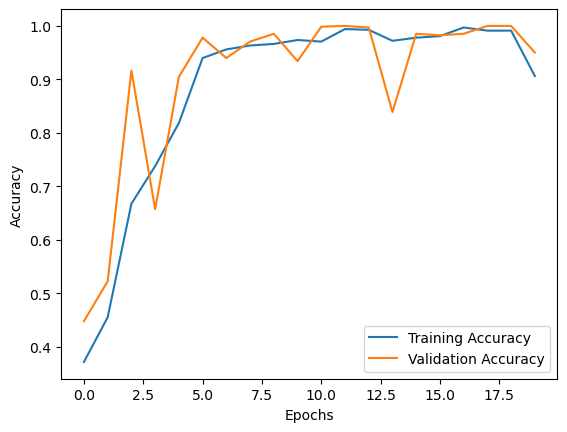

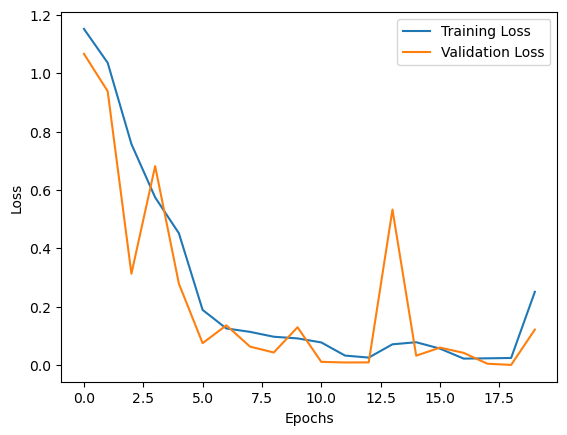

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define paths
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, (200, 200)) / 255.0  # Resize and normalize
    return image, label

# Load datasets using tf.keras.utils.image_dataset_from_directory
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(200, 200),
    batch_size=50
)

raw_val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(200, 200),
    batch_size=50
)

# Get class names before applying preprocessing
class_names = raw_train_dataset.class_names
print("Class names:", class_names)

# Preprocess and optimize pipeline
train_dataset = raw_train_dataset.map(preprocess_image).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = raw_val_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=[200, 200, 3]),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=len(class_names), activation='softmax')  # Adjusted to match class count
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 15 files belonging to 3 classes.
Test Loss: 29.2105
Test Accuracy: 33.3333%


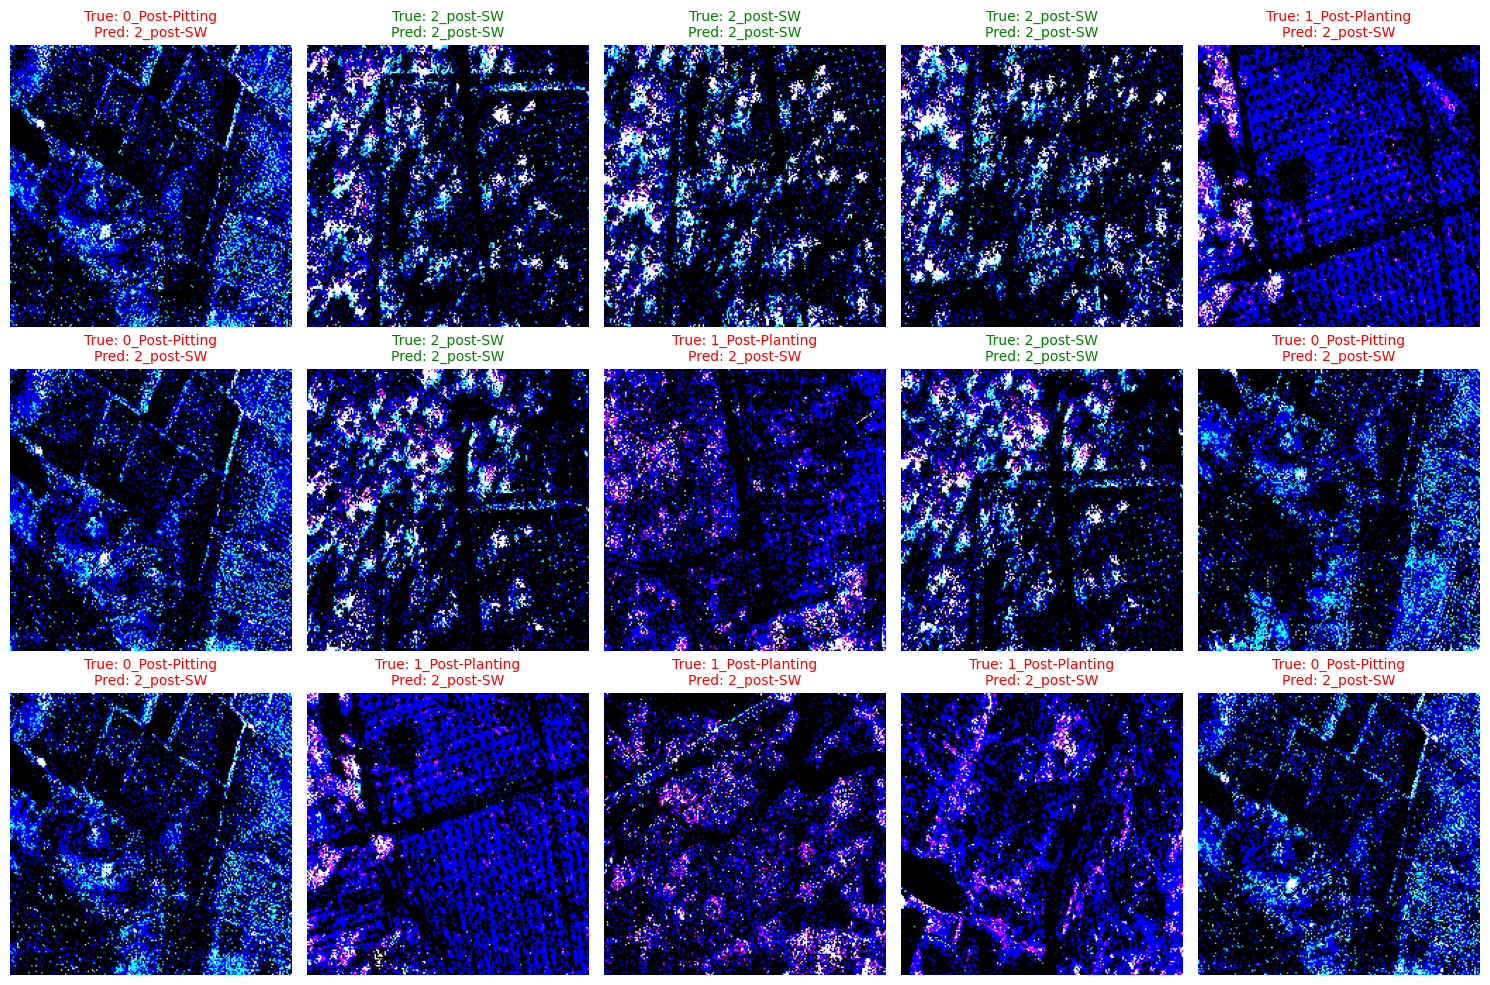

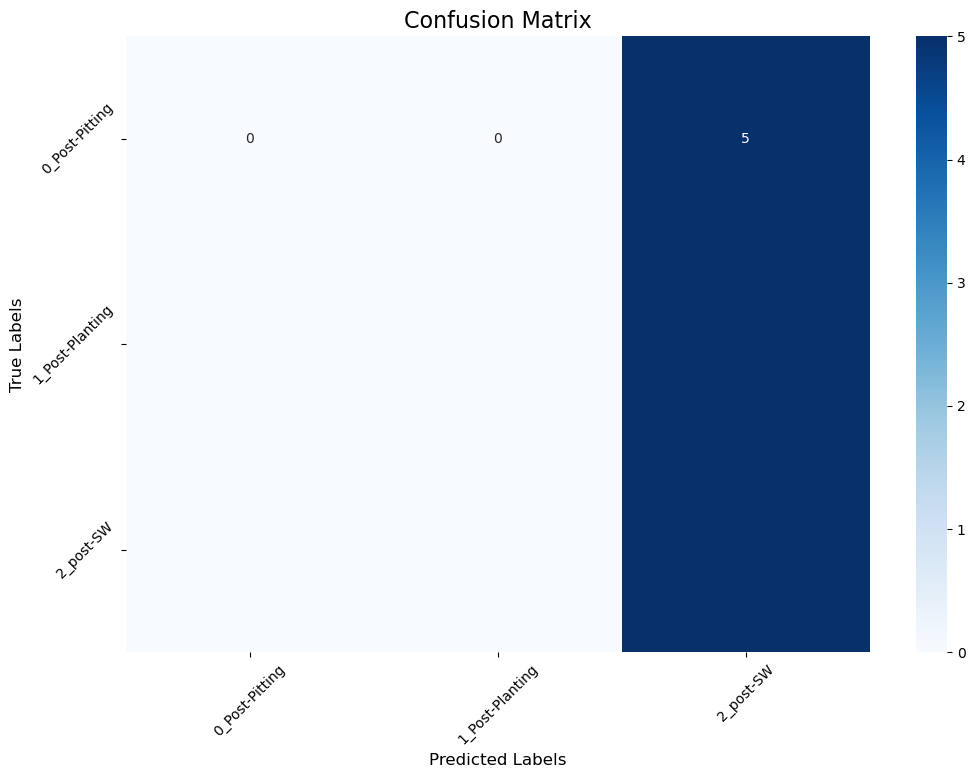

Classification Report:
                 precision    recall  f1-score   support

 0_Post-Pitting       0.00      0.00      0.00         5
1_Post-Planting       0.00      0.00      0.00         5
      2_post-SW       0.33      1.00      0.50         5

       accuracy                           0.33        15
      macro avg       0.11      0.33      0.17        15
   weighted avg       0.11      0.33      0.17        15



C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the dataset directory
test_dir = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing"

# Load the dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Save the class names before preprocessing
class_names = test_dataset.class_names

# Preprocess the dataset (if required)
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image)  # Standardize images
    return image, label

test_dataset = test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# Visualize predictions grid
num_images_to_display = 15  # Adjust the number of images to display
y_pred = []
y_true = []
images_list = []

# Collect predictions and images
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())
    images_list.extend(image_batch.numpy())

# Convert to NumPy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
images_list = np.array(images_list)

# Randomly select indices for visualization
indices = np.random.choice(len(y_pred), size=num_images_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    img = images_list[idx]
    true_label = class_names[y_true[idx]]
    predicted_label = class_names[y_pred[idx]]
    
    plt.subplot(3, 5, i + 1)  # Create a 3x5 grid for 15 images
    plt.imshow(img.astype("uint8"))
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10, color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 683 files belonging to 3 classes.
Found 683 files belonging to 3 classes.
Found 15 files belonging to 3 classes.
Class names: ['0_Post-Pitting', '1_Post-Planting', '2_post-SW']


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │    40,960,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,364,355 (157.79 MB)

 Trainable params: 41,364,355 (157.79 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.3622 - loss: 2.5516 - val_accuracy: 0.4480 - val_loss: 1.0687
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.4602 - loss: 1.0629 - val_accuracy: 0.4480 - val_loss: 1.0514
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.4193 - loss: 1.0580 - val_accuracy: 0.5344 - val_loss: 0.9719
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.4439 - loss: 0.9683 - val_accuracy: 0.6955 - val_loss: 0.7994
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 177s 8s/step - accuracy: 0.6289 - loss: 0.7533 - val_accuracy: 0.7950 - val_loss: 0.5259
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.8015 - loss: 0.4731 - val_accuracy: 0.4012 - val_loss: 1.4373
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.6006 - loss: 0.9018 - val_accuracy: 0.8141 - val_loss: 0.4581
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.8687 - loss: 0.3638 - val_accuracy: 0.9063 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.3333 - loss: 229.8233
Test Loss: 229.8233
Test Accuracy: 33.3333%


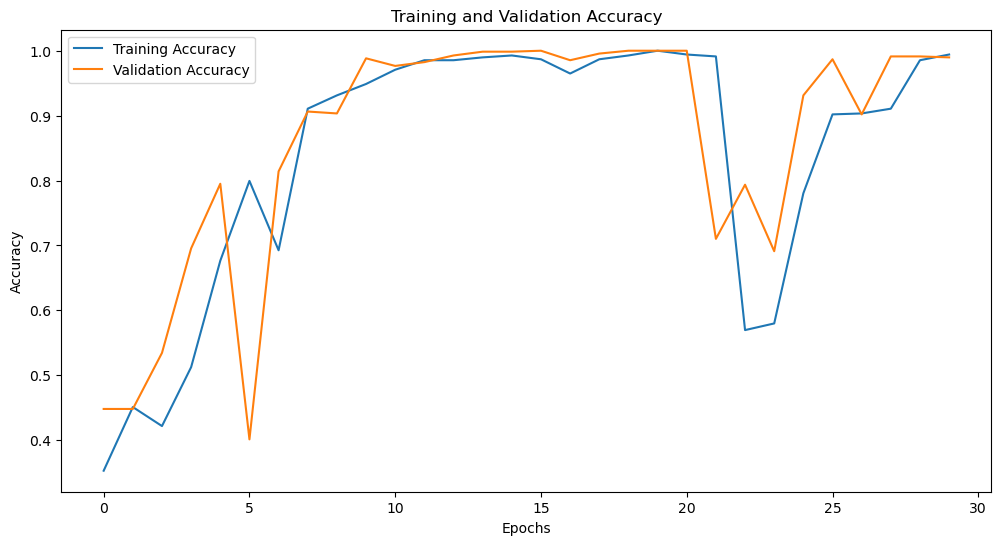

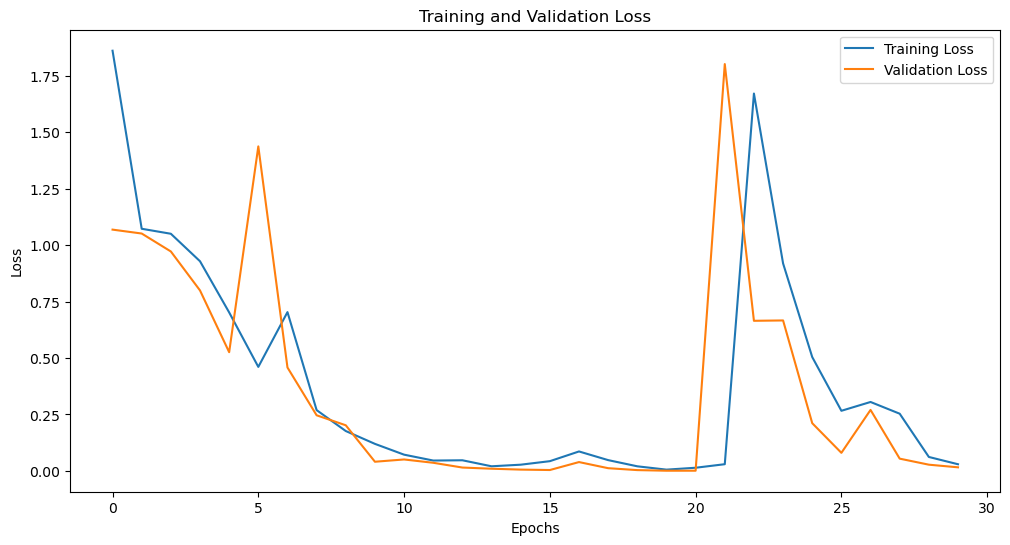

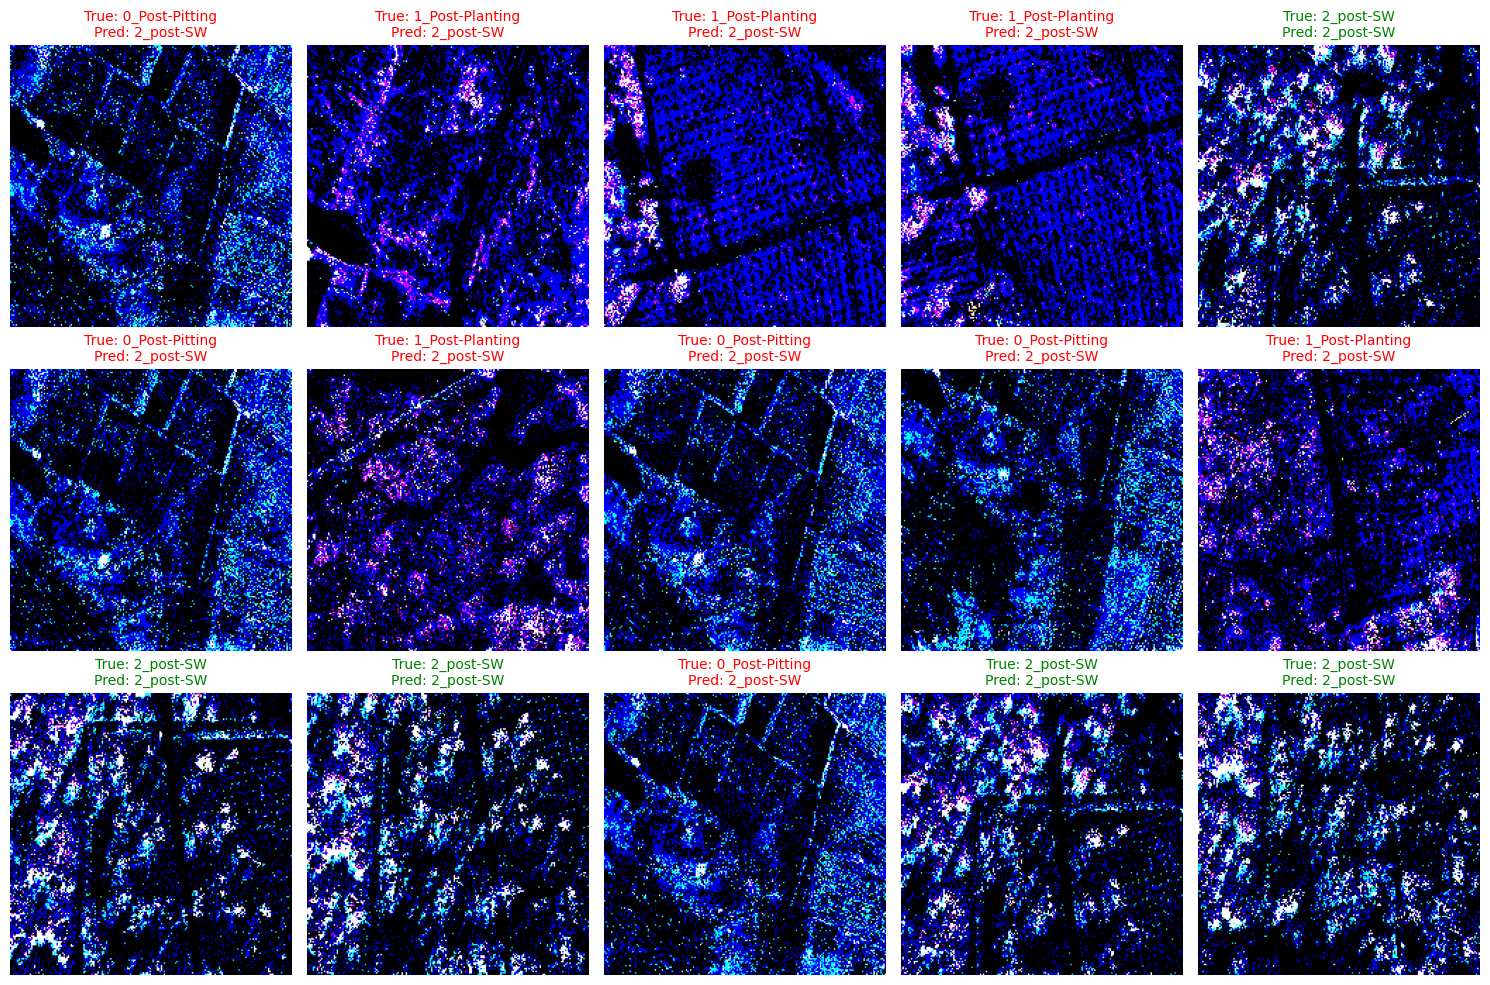

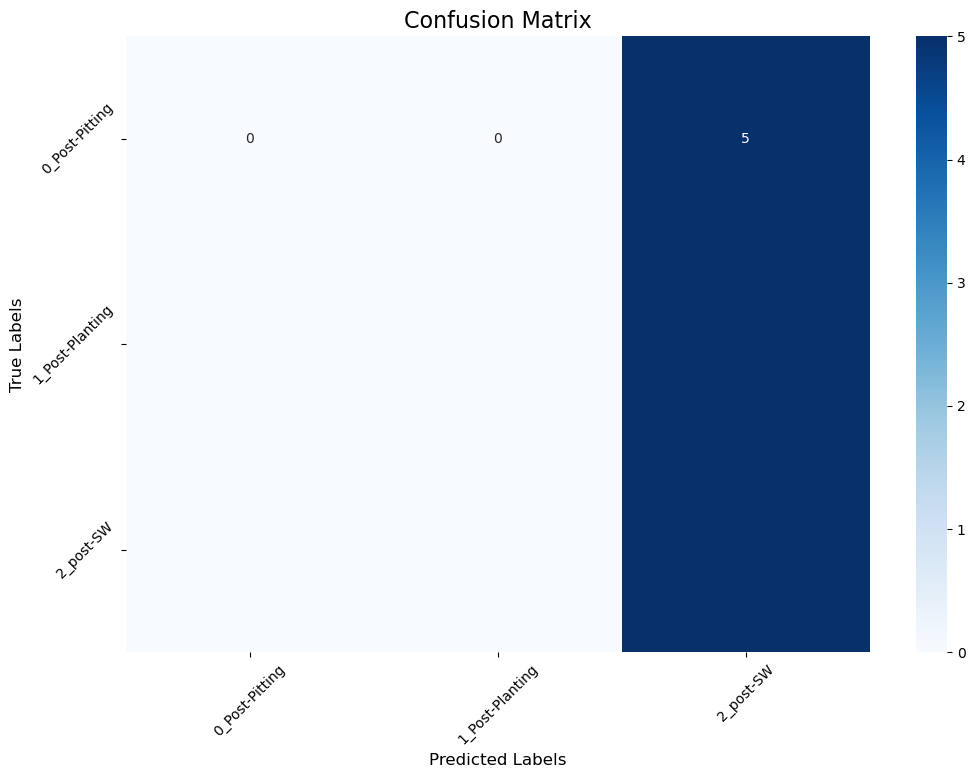

Classification Report:
                 precision    recall  f1-score   support

 0_Post-Pitting       0.00      0.00      0.00         5
1_Post-Planting       0.00      0.00      0.00         5
      2_post-SW       0.33      1.00      0.50         5

       accuracy                           0.33        15
      macro avg       0.11      0.33      0.17        15
   weighted avg       0.11      0.33      0.17        15



C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define dataset directories
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"
test_dir = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing"

# Preprocessing function
def preprocess_image(image, label):
    image = tf.image.resize(image, (200, 200)) / 255.0  # Normalize to [0, 1]
    return image, label

def preprocess_image_test(image, label):
    image = tf.image.per_image_standardization(image)  # Standardize test images
    return image, label

# Load datasets
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(200, 200),
    batch_size=50
)
raw_val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(200, 200),
    batch_size=50
)
raw_test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Get class names
class_names = raw_train_dataset.class_names
print("Class names:", class_names)

# Preprocess datasets
train_dataset = raw_train_dataset.map(preprocess_image).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = raw_val_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)
test_dataset = raw_test_dataset.map(preprocess_image_test).prefetch(tf.data.AUTOTUNE)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same', activation='relu', input_shape=[200, 200, 3]),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    verbose=1
)

# Save the model
model.save('tree_classification_cnn_model.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Visualize predictions
y_pred = []
y_true = []
images_list = []

for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())
    images_list.extend(image_batch.numpy())

# Convert to NumPy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
images_list = np.array(images_list)

# Visualize some predictions
num_images_to_display = 15
indices = np.random.choice(len(y_pred), size=num_images_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    img = images_list[idx]
    true_label = class_names[y_true[idx]]
    predicted_label = class_names[y_pred[idx]]
    
    plt.subplot(3, 5, i + 1)
    plt.imshow(img.astype("uint8"))
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10, color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))